# spectral clustering kernel 
## rbf vs nearest_neighbours

In [1]:
import numpy as np
import SRC.EDA as EDA
from sklearn.cluster import SpectralClustering

In [6]:
from sklearn.datasets import load_iris
iris =  load_iris()
spec_rbf  =  SpectralClustering(n_clusters=3)
spec_negh =  SpectralClustering(n_clusters=3,affinity='nearest_neighbors')


In [7]:
lbls_rbf =  spec_rbf.fit_predict(iris.data)
lbls_negh =  spec_negh.fit_predict(iris.data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


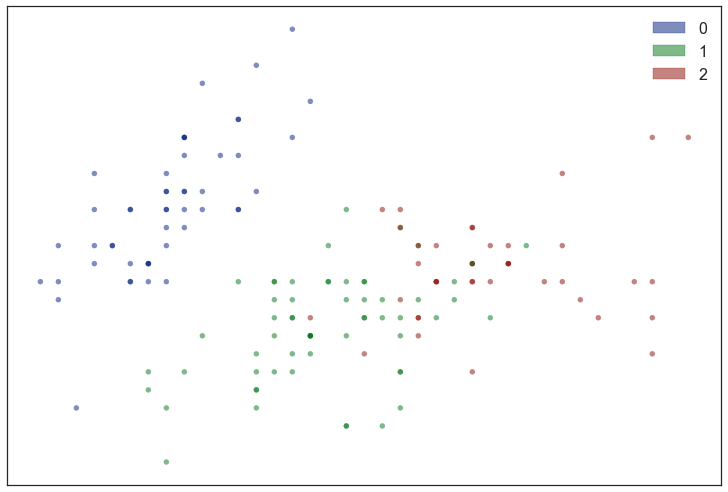

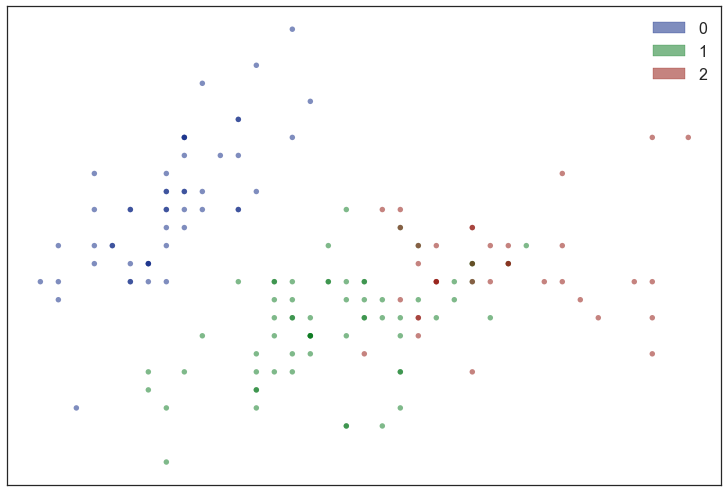

In [9]:
EDA.visualise_2D(iris.data.T[0],iris.data.T[1],lbls_rbf)
EDA.visualise_2D(iris.data.T[0],iris.data.T[1],lbls_negh)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(iris.data,labels=lbls_rbf)

0.55092963494454728

In [15]:
silhouette_score(iris.data,labels=lbls_negh)

0.55393438982672993

In [19]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(lbls_negh,iris.target)

(0.81564568824070571, 0.79598162278124118, 0.80569369121533596)

In [20]:
homogeneity_completeness_v_measure(lbls_rbf,iris.target)

(0.77179173449581129, 0.76036457980416694, 0.7660355440487252)

In [23]:
from sklearn.metrics import classification_report
print (classification_report(lbls_negh,iris.target))
print(classification_report(lbls_rbf,iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.78      0.88        64
          2       0.72      1.00      0.84        36

avg / total       0.93      0.91      0.91       150

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.79      0.86        61
          2       0.74      0.95      0.83        39

avg / total       0.92      0.90      0.90       150



In [24]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(iris.data, n_neighbors=10,include_self=True)
affinity_matrix_2 = 0.5 * (connectivity + connectivity.T)
affinity_matrix_2

<150x150 sparse matrix of type '<class 'numpy.float64'>'
	with 1936 stored elements in Compressed Sparse Row format>

In [25]:
print(affinity_matrix_2)

  (0, 48)	0.5
  (0, 46)	0.5
  (0, 43)	0.5
  (0, 36)	0.5
  (0, 26)	0.5
  (0, 22)	0.5
  (0, 20)	0.5
  (0, 19)	0.5
  (0, 21)	1.0
  (0, 49)	1.0
  (0, 7)	1.0
  (0, 40)	1.0
  (0, 28)	1.0
  (0, 27)	1.0
  (0, 39)	1.0
  (0, 4)	1.0
  (0, 17)	1.0
  (0, 0)	1.0
  (1, 41)	0.5
  (1, 2)	1.0
  (1, 35)	1.0
  (1, 30)	1.0
  (1, 25)	1.0
  (1, 9)	1.0
  (1, 37)	1.0
  :	:
  (147, 110)	1.0
  (147, 147)	1.0
  (148, 100)	0.5
  (148, 104)	0.5
  (148, 144)	0.5
  (148, 124)	0.5
  (148, 137)	0.5
  (148, 140)	0.5
  (148, 147)	0.5
  (148, 110)	0.5
  (148, 115)	1.0
  (148, 136)	1.0
  (148, 148)	1.0
  (149, 114)	0.5
  (149, 113)	0.5
  (149, 123)	0.5
  (149, 126)	1.0
  (149, 121)	1.0
  (149, 83)	1.0
  (149, 70)	1.0
  (149, 101)	1.0
  (149, 142)	1.0
  (149, 138)	1.0
  (149, 127)	1.0
  (149, 149)	1.0


In [26]:
affinity_matrix_2.toarray()

array([[ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  1. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.5,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]])

In [28]:
import numpy as np
np.unique(affinity_matrix_2.toarray())


array([ 0. ,  0.5,  1. ])

In [29]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [34]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

In [36]:
X, y = noisy_circles
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)



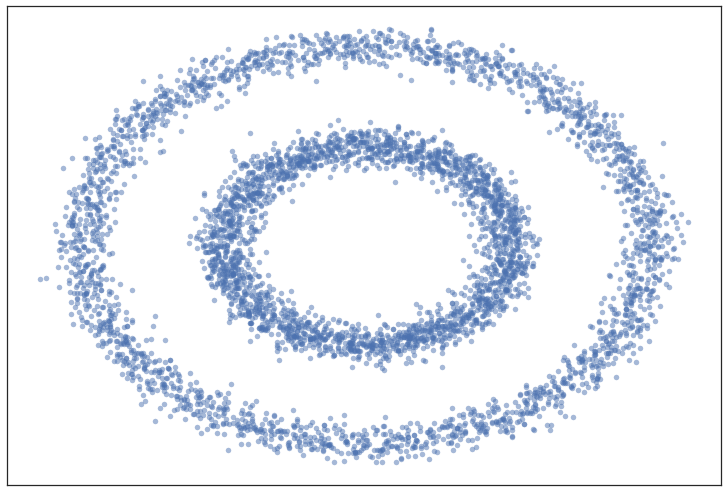

In [37]:
EDA.visualise_2D(X.T[0],X.T[1])

In [39]:
spectral = SpectralClustering(n_clusters=2,affinity="nearest_neighbors")

In [40]:
labels_circ = spectral.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


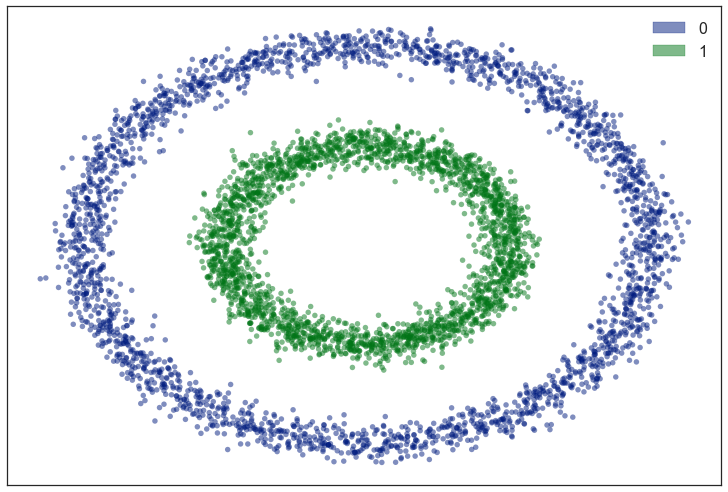

In [41]:
EDA.visualise_2D(X.T[0],X.T[1],labels_circ)